## Лабораторная работа #5. Решение СЛАУ.
***
* Работу выполнил студент Пугавко М.М. 430 гр

Так как у нас в СЛАУ нахходятся интегралы, то для начала необходимо расчитать их. Расчитывать интеграллы будем методом трапеций.

#####  Вычисление интегралла методом трапеций.
***
Пусть у нас задан интеграл $ \int_{а}^{b} f(x) dx     $. Требуется вычилить его на отрезке $[a,b]$, для этого воспользуемся методом трапеций. Мы вычисляем площади трапеций под графиком функции, т.е. бьем область под графиком на множество трапеций и вычисляем значение интеграла по следующей формуле:
$$ \int_{a}^{b} f(x) dx  = \sum_{1}^{N-1} \frac{[f(x)+f(x+dx)]}{2}h$$,
где h определяется выражением: $h = [b-a]/N$.
Значением N определяется разбивка всей площади на трапеции, но ее нужно уметь определять, по этому воспльзуемся формулой для погрешности по остаточному члену, для этого нам потребуется найти вторую производную от подинтегральной функции и найти ее максимум на отрезке [a,b]. В python есть встроенный метод max, которым мы сможем определить максимальное значение второй производной на данном отрезке, тем самым выпишим формулу для погрешности:

$$R_n < \frac{(b-a)^3M}{8N}$$,
Эта формула для абсолютной погрешности, но деля это значение на значение интеграла, для данного N, легко можно найти относительною погрешность и из условия, что она не должна превышать 0.01 (по условию задания), легко можно найти значение N.

Итак интеграл мы вычислили, но теперь необходимо переходить к вычисление СЛАУ, разберем метод простых итераций или, что тоже самое метод последовательных прибилижений.
***

###### Решение СЛАУ методом простых итераций
****
Все формулы будем писат в вектроном виде, для более краткой и быстрой записиси.

Пусть, есть система линейных уравнений:
                                                                      $$Ax=b (1)$$ 

Приведем систему (1) к следующему виду:
$x = Tx  +  b$ $ (2)$,

где A выражается через T следующим образоам:
$$ A = T - E$$,
E <- матрица, на главной диагонали стоят единицы. 
Перейдем к объяснению самого метода. 

Пусть дана система (2). Метод простых итераций заключается в том, что мы постепенно приближаем значения x, начиная с какго-то нулего приближения, но возьмем за нулевое приближение b, в нашем случае b - это вектор столбец интеграллов, которые мы выпишем ниже. Схема вычислений:
$$x^{(0)} = b$$
$$x^{(1)} = Ax^{(0)} + b$$
$$...$$
$$x^{(k+1)} = Ax^{(k)} + b$$
$$...$$
Но нам необходимо уметь рассчитывать точность сис емы, для этого мы покажем способ проверки точности вычисления системы, для этого мы должны сравнивать значения предыдущей итерации со значений последующей итерациии, покажем формульно это, также учтем, что у нас задана относительная погрешность равная 0.001. А значит, что мы поделим абсолютную погнрешность на значение x.
$$|x^{(K+1)} - x^{(k)}| < 0.001$$

Мы будем сравнивать только первое значение, так как это будет выполнено для любого $x_i$ из системы. 
***
Вся теория готова для нашей работы, но заберем дополнительные задания, которые предоствлены к нашей работе.

1)

> построение графика зависимости значения интеграла от итерациии. Это довольно легко сделать, для этого необходимо строить график на каждой  итерации, либо заполнять одномерный массив, а потом его строить с помощью моодуля matplot.

2)

> Использование встроенного метода в модуль numpy trapz(Y, x, dx). Y - массив значений функции f(x), в точках x, можно не заполнят массив x, на достаточно задавать массив Y и шаг dx. Можно предположить, что результаты должны слвпасть, так как trapz считает методом трапеций.

3)

> Решение 10000 уравнений, в основном задании дана 1000 уравнений, но писать программу мы будет сразу для 10000, так как нет рзаницы, если написать на 10000, то прграмма точно должна выполняться для 1000 уравнений. Для этого будем писать программу с расчетом на то, чтобы при запуске программы она спрашивала коичество уравнений, которые нужео решить, так же это упростит проверку программы, так как можно будет задавать 2 уравнения, а их проверить не сложно, а вообще проверку будем осуществлять с помощью linalg.solve, но о нем поговорим в следующем пункте. 

4)

> Использование метода linalg.solve(A, b) в модуле numpy. Матрицы A и b такие, как в системе (1). При сравнении с решением не должны сильно отличаться от нашего. А вообще говоря должны совпадать, как говорилось в пункте выше, с помощью этого метода можно проверить адекватность нашего решения.

5)

> Построение графиков X(i). Построение необходимо проводить, как для нашего решения, так и для решения сказанного в пункте 4). 
> Ясно, что они должны совпадать, этим мы и проведем проверку нашего решения.

***
###### Задание.
***
Нам задана следующая система:
$$n^3x_i = \sum_{j = 1 }^ n \frac{j^2 + cos(j)}{1 + j^2 + i^2}x_j + \int_{1}^{3} ln(ln(10 + i + cos(t))) dt, i = 1, 2, ...$$
Если поделить все на $n^3$, тогда матрицы T и b будут определены. 

Вычислять интеграл мы будем методом трапеций, как говорилось выше, сравнивать с встроенным методом trapz в numpy. Относительная точность задана равной 0.01.

Вычислять систему будем методом простых итераций, как говорилось выше. Решение сравнивать будем с встроенным методом linalg.solve в numpy. 

Выполня задание мы будем пользоваться парадигмой ООП, а также по максимуму функции, если скорость выполнения программы не будет достаточно хорошей, то будем использовать матричные методы из numpy, а в противном обойдемся минимальным использованием данных методов.

Для упрощения мониторинга выполнения программы зададим счетчик времени и строку прогресса выполнения программы.


The precision of the system .001
quantity 1001
itaration_info 20


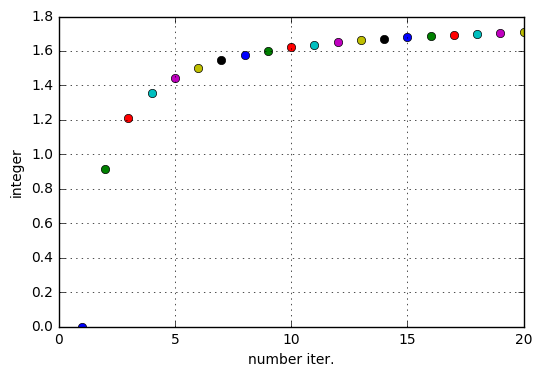

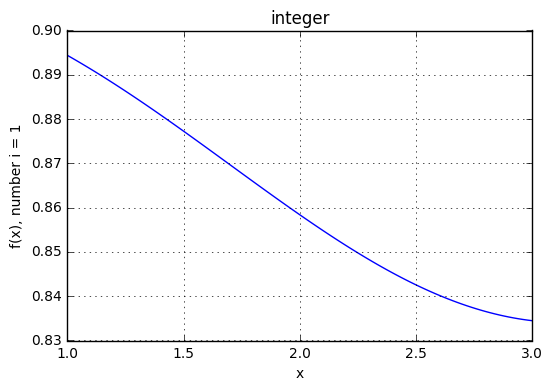

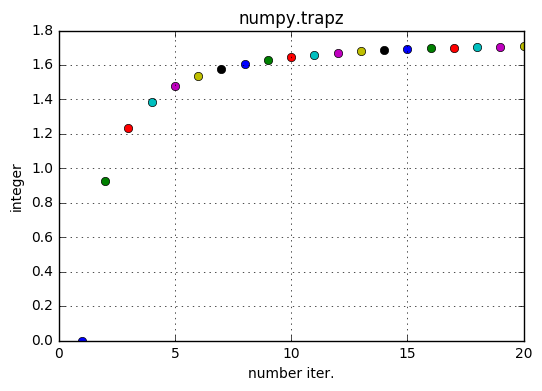

Percent: [----------] 0.0% 
 Матрица интегралов

 [[  1.73234104e-09]
 [  1.79624668e-09]
 [  1.85304758e-09]
 ..., 
 [  3.64221427e-09]
 [  3.64248379e-09]
 [  3.64275301e-09]] 
 


    *
    *
    *
    *
Percent: [##########] 99.9000999000999% 
 Матрица коэффициентов

 [[  5.11896875e-10   5.95520512e-10   7.26002315e-10 ...,   9.97004991e-10
    9.97004557e-10   9.97003610e-10]
 [  2.55948438e-10   3.97013675e-10   5.70430390e-10 ...,   9.97001994e-10
    9.97001566e-10   9.97000625e-10]
 [  1.39608239e-10   2.55223077e-10   4.20317130e-10 ...,   9.96996999e-10
    9.96996581e-10   9.96995650e-10]
 ..., 
 [  1.53876354e-15   3.58026211e-15   8.00194132e-15 ...,   4.98503245e-10
    4.99001778e-10   4.99499555e-10]
 [  1.53568755e-15   3.57310521e-15   7.98594560e-15 ...,   4.98004492e-10
    4.98503026e-10   4.99000804e-10]
 [  1.53262079e-15   3.56596974e-15   7.96999780e-15 ...,   4.97506240e-10
    4.98004773e-10   4.98502551e-10]]
1
Percent: [##########] 99.9000999000999% 
 X(i

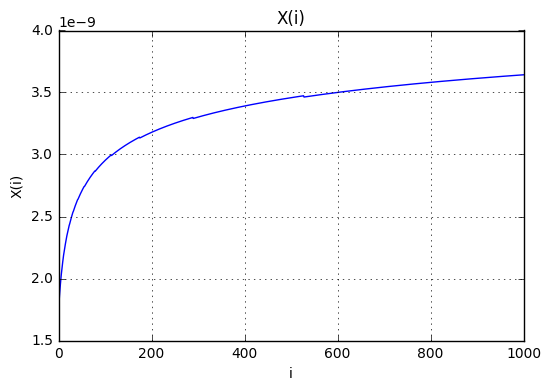

Percent: [##########] 99.9000999000999% 

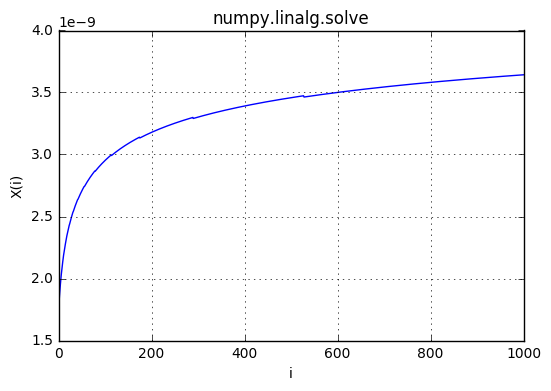

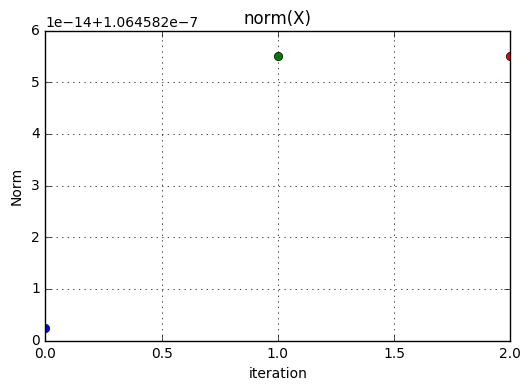

Разница между решениями
[[  4.13590306e-25]
 [  0.00000000e+00]
 [  0.00000000e+00]
 ..., 
 [  1.24077092e-24]
 [  4.13590306e-25]
 [  1.24077092e-24]]
time: 10.443405 sec


In [1]:
%matplotlib inline
import time, sys
import matplotlib.pyplot as plt
import math as ma
import numpy as na
import array
#-----------------------------------------------------------------------------------------------------------------------------------------   
iteration = 1
eps = float(input('The precision of the system ' ))
quantity = int(input('quantity '))
itaration_info = int(input('itaration_info ')) 	# Посмотрим зависимость значения интеграла  от номера итераций итер.
def f_diff(x,l):
	return -ma.cos(x) - (1 - ma.sin(x)*ma.log(10+l+ma.cos(x)) )/(ma.log(10+l+ma.cos(x))*(10+l+ma.cos(x)))**2
def update_progress(progress): # Пишем progress_bar, можно использовать класс, но для удобства обойдемся функцией
    barLength = 10 
    status = ""
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
        status = "error: progress var must be float\r\n"
    if progress < 0:
        progress = 0
        status = "Halt...\r\n"
    if progress >= 1:
        progress = 1
        status = "Done...\r\n"
    block = int(round(barLength*progress))
    text = "\rPercent: [{0}] {1}% {2}".format( "#"*block + "-"*(barLength-block), progress*100, status)
    sys.stdout.write(text)
    sys.stdout.flush()
class all_function:                  		#зададим класс, в который помещаем основной набор функций.
	def __init__(self, h):
		self.h = h 
		self.X = 0
		self.k = 0
	def __del__(self): 
		pass        
	def f_integer(self, x, i):  		#подинтегральная функция	
		f = ma.log(ma.log(10 + i + ma.cos(x)))
		return f
	def integer1(self, e):	    		#интеграл
		aRea = 1
		delta = 10
		ep = 0.01
		Xaprox = na.linspace(1,3,1000)
		ydif = [f_diff(k,e) for k in Xaprox]  
		Max = ma.fabs(max(ydif))
		iteration = 2
		while (float(((8*Max/(12*iteration)))/aRea) > ep):
			aRea = 0 
			X = na.zeros((1 ,iteration ))
			X[0,0] = 1
			for i in range(1, iteration-1):
				X[0,i+1] = X[0, i] + 2/iteration	
			for k in range (0, iteration - 1):
				aRea += (self.f_integer( X[0,k], e) + self.f_integer( X[0,k+1], e))/2*(2/iteration)													
			iteration  += 1              
		return aRea
	    
	def integer(self,i):      #интеграл
		aRea = 0
		for k in range(0,iteration - 1):            
			aRea += (self.f_integer( X[0,k], i) + self.f_integer( X[0,k+1], i))/2*c.h
		return aRea
	def sum_functon(self, l, j):            #стоящая под суммой
		return (j**2 + ma.cos(j))/(1+j**2 +l**2)
#----------------------------------------------------------------------------------------------------------------------------------- 
class matrix:						#Создадим класс для работы с матрицами
	def __init__(self, i, j, valueMatrix):
		self.i = i
		self.j = j
		self.Matr = na.zeros((self.i,self.j))
		self.valueMatrix = na.zeros((self.i,self.j))
	def enterMatrix(self):
		s = 0				#заполнение матрицы
		n = 0
		r = 0
		for p in range(0, self.j):
			for k in range(0,self.i):
				if (self.j == 1):               
					self.valueMatrix[k, 0] = c.integer1(k+1)/quantity**3  
					update_progress(k/quantity)
				else:
					self.valueMatrix[p, k] = ((k+1)**2 + ma.cos((k+1)))/(1+(k+1)**2 +(p+1)**2)/(quantity**3)
			update_progress(p/quantity)
	def __del__(self): 
		pass
class SLD:                                      #Класс для вычисления СЛАУ
    def __init__(self, X = 0):
        self.X = 0
    def Aproximation(self, a, x):
        return a*x 
    def System(self):
        x = 0
        X = self.X
        Aproxim_number = na.zeros((quantity,1))
        for p in range(quantity):
            update_progress(p/quantity)
            x = 0
            for k in range(quantity):
               x += self.Aproximation(matrixSum[k,p], self.X[k, 0])
            Aproxim_number[p,0] = x + matrixInteger[p,0]
        return Aproxim_number
    def __del__(self):
        pass
start = time.time()
#-----------------------------------------------------------------------------------------------------------------------------------------					
#-----------------------------------------------------------------------------------------------------------------------------------------
c = all_function(2/iteration)                #  Закид. в класс атрибут с шагом  интеграла
X = na.zeros((1,iteration + 1))
X[0,0] = 1
for i in range(0, iteration,1):
	X[0,i+1] = X[0, i] + c.h
c.X = X
#-----------------------------------------------------------------------------------------------------------------------------------------
for iteration in range(1,itaration_info+1):   # Посмотрим зависимость значения интеграла  от номера итераций итер.
	X = na.zeros((1,iteration + 1))
	c = all_function(2/(iteration))
	X = na.zeros((1 ,iteration ))
	X[0,0] = 1
	for i in range(0, iteration-1):
		X[0,i+1] = X[0, i] + c.h
	c.X = X	
	xnew = iteration
	ynew = c.integer(2)
	plt.plot(xnew, ynew , 'o')
plt.xlabel('number iter.')
plt.ylabel('integer')
plt.axis([0, itaration_info, 0, 1.8])
plt.grid(True)
plt.show()
xnew = na.linspace(1,3,100)
ynew = [c.f_integer(k, 1) for k in xnew]
plt.plot(xnew, ynew)
plt.ylabel('f(x), number i = 1')
plt.xlabel('x')
plt.title('integer')
plt.grid()
plt.show()
del c
#-----------------------------------------------------------------------------------------------------------------------------------------
#шаг сетки определяется значением (2/iteration) (c.h)
Y = []
X[0,0] = 1
for iteration in range(0, itaration_info):
	c = all_function(2/(iteration+1))
	Y.append(c.f_integer(X[0,iteration],2))
	xnew = iteration + 1
	ynew = na.trapz(Y, None, 2/(iteration+1))
	plt.plot(xnew, ynew, 'o'	)
plt.axis([0, itaration_info, 0, 1.8])
plt.title('numpy.trapz')
plt.xlabel('number iter.')
plt.ylabel('integer')
plt.grid(True)
plt.show()

#-----------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------
i = quantity
j = quantity
c = all_function(2/iteration) 
m = matrix(i, 1,0)
m.enterMatrix()				 #Матрица интеграллов для СЛАУ
matrixInteger = m.valueMatrix
print('\n Матрица интегралов')
print('\n',matrixInteger, '\n \n')
print (4*'\n    *')
mat = matrix(i, j, 0)
mat.enterMatrix()            #Матрица коэффициентов
matrixSum = mat.valueMatrix
print('\n Матрица коэффициентов')
print('\n',matrixSum)

#-----------------------------------------------------------------------------------------------------------------------------------------	
# Начнем вычисление Слау, за нулевое приближение берем значение интегралов 
Norm = []
Norm.clear()
SLd = SLD()
SLd.X = matrixInteger #Нулевое приближение, есть значение интеграла. 
print('1')
Delta = 10
SLd_one = na.zeros((1,1))
Norm.append(na.linalg.norm(SLd.X))
o = 0
while (Delta > eps):
    Delta = (SLd.X[0,0] - SLd_one[0,0])/SLd.X[0,0]
    SLd_one = SLd.X
    SLd.X = SLd.System()
    Norm.append(na.linalg.norm(SLd.X))
    
    o += 1
print('\n X(i) \n') 
print(SLd.X)

#-----------------------------------------------------------------------------
xnew = []
for i in range(quantity):    #solve SL, plot
    xnew.append(i)
ynew = [SLd.X[k,0] for k in range(quantity)]
plt.plot(xnew,ynew)
plt.grid(True)
plt.title('X(i)')
plt.ylabel("X(i)")
plt.xlabel("i")
plt.show()
del SLD
del m
del c
del X
del xnew 
del ynew
del Y
del mat
a = na.zeros((quantity,quantity)) #linalg.solve and plot
b = na.zeros((quantity, 1))
for p in range(quantity):
    update_progress(p/quantity)
    for k in range(quantity):
        if (k == p):
            a[p, k] = (1-matrixSum[k,p])
        else: a[p, k] = (-matrixSum[k,p])
    b[p, 0] = matrixInteger[p,0]
del matrixSum
del matrixInteger
SOLVE = na.linalg.solve(a, b)
xnew = []
for i in range(quantity):
    xnew.append(i)
ynew = [SOLVE[k] for k in range(quantity)]
plt.plot(xnew,ynew)
plt.grid(True)
plt.title('numpy.linalg.solve')
plt.ylabel("X(i)")
plt.xlabel("i")
plt.show()
del a
del b
#----------------------------------------------------------------------------------------------------------------------------------
xnew.clear()
ynew.clear()
for i in range(o+1):
    xnew = i
    ynew = Norm[i]
    plt.plot(xnew, ynew, 'o')
plt.title('norm(X)')
plt.xlabel('iteration')
plt.ylabel('Norm')
plt.grid(True)
plt.show()
print('Разница между решениями')
print(SLd.X - SOLVE)
print ('time: %f' % (time.time() - start), 'sec')



#####  Вывод 
****

>Код выполняется за адекватное время, поэтому будем считать, что программа достаточно оптимизированна.
***
>Сравнение графиков зависимости значения интеграла от итерации с trapz показало, что они совпадают, сделанное ввыше предположение о том, что они должны совпадать подтвердилось. 
***
>Сравнение графиков решения и решения методом solve совпадают, что подтверждает адекватность нашего метода. А разница решений показывает небольшую разницу между решениями, что скорее всего получается из-за погрешностей вычисленея
***
>График значения нормы решения показывает, что с каждой итерацией норма отличается меньше, что логично и должно быть так, по 
графику видно, что второе приближение мало отличается от первого, значит разница между уже маленькая, а по условию, которое стоит в счетчике while определяется, что на этой итерации счетчик необходимо остановить
***


> Классы использованы не целесообразно, так как использовались, лишь в качестве моей тренировке работы с классами. 
